In [1]:
%%html
<style>
.instruction-cell {
    background-color: #dff0d8; /* light green */
    border-left: 5px solid #3c763d;
    padding: 10px;
    border-radius: 5px;
    margin-bottom: 10px;
}
</style>

# 2025S 052600-1 Signal and Image Processing

# Programming Test exam

#### Research Group Neuroinformatics
#### University of Vienna
#### Tuesday, June 17th 2025 & Friday, June 20th 2025

## Exam Guidelines

**Python version and allowed packages**: You are working inside a Jupyterlab environment.\
The Python version installed is Python 3.12. You are only allowed to use the packages and\
functions as imported in the specific exercises. These are `matplotlib`, `numpy`, and\
selected parts of `scipy` (specifically `scipy.signal` and `scipy.fftpack`).

Additionally, you are allowed to fully make use of the websites as defined in **Table 1**.

**Auxiliary materials**: You are allowed to use one handwritten, double-sided A4 page with\
your own notes. This can include anything you find helpful - summaries of theoretical\
concepts, Python code snippets, etc.

**Plagiarism**: You have to solve all the questions on this exam alone. We will perform\
plagiarism checks on your submission, which may include asking you to answer additional\
oral questions up to four weeks after the exam.

**Exam time and submission**: You have 90 minutes to complete the exam. After that time,\
you should close the notebook as instructed by the student assistants.

**During the exam**: You have to answer the questions directly in the Jupyter notebook. \
If you need additional paper for notes, please ask one of the student assistants.

**Questions**: If you have problems understanding a specific question, you can ask one of\
the student assistants for help.

**Important Implementation Notes**: Make sure that the Jupyter notebook executes from\
top to bottom without errors. Use `Kernel` →  `Restart Kernel and Run All Cells...`\
in the menu bar. Do not use instruction blocks to write your answers. Use the \
provided code or text cells, or insert new ones where appropriate.


| Category                 | URL                                                                                           | Notes                         |
| ------------------------ | --------------------------------------------------------------------------------------------- | ----------------------------- |
| **Python**               | [https://docs.python.org/3/](https://docs.python.org/3/)                                      | Official Python docs          |
| **NumPy**                | [https://numpy.org/doc/](https://numpy.org/doc/)                                              | NumPy documentation           |
| **SciPy**                | [https://docs.scipy.org/doc/scipy/](https://docs.scipy.org/doc/scipy/)                        | Especially `scipy.signal`     |
| **Matplotlib**           | [https://matplotlib.org/stable/contents.html](https://matplotlib.org/stable/contents.html)    | Plotting library docs         |
| **Jupyter**              | [https://jupyter.org/documentation](https://jupyter.org/documentation)                        | Jupyter notebook docs         |

<center>Table 1: Whitelisted websites</center>

## Basic package imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io.wavfile as wav

## Part I: Digital Radio Receiver

<div class="instruction-cell">

You work in a radio and telecommunications ground station. You have received 0.125 seconds of a speech **signal** sampled at **8 kHz** via an old telephone line. This short segment was captured during a maintenance test to check signal quality. Your task is to analyze and filter this signal to prepare it for further transmission.

</div>

### 1. Discrete Fourier Transform (DFT) and inverse DFT (iDFT)
<div class="instruction-cell">In radio and telecommunications, frequency-domain analysis is essential for understanding and manipulating signals for transmission.



## Load the audio file

Fs: 8000
Length: 1000


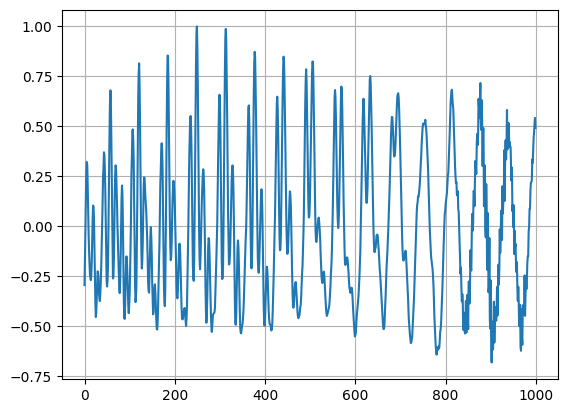

In [3]:
# Load audio file
fsx, x = wav.read('./audio/speech.wav')
x = x / np.max(np.abs(x))

plt.plot(x)
plt.grid()
print("Fs:", fsx)
print("Length:", len(x))

<div class="instruction-cell">

#### a)
Write the **functions to compute the DFT and iDFT** of a discrete-time signal **without using built-in FFT functions**.

***Hint**: Depending on your implementation, consider using the `dtype=complex` argument!*

Recall,

Discrete Fourier Transform (Analysis); $$X(k) = \sum_{n=0}^{N-1} x[n] \exp \left( {-j.\frac{ 2\pi k}{N}. n} \right)$$


inverse Discrete Fourier Transform (Synthesis); $$x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X(k) \exp \left( {j.\frac{ 2\pi k}{N}. n} \right)$$

***Note**: If you have troubles implementing the DFT and iDFT, you are allowed to use `np.fft.fft()` and `np.fft.ifft()` for all upcoming exercises.* 
</div>

In [4]:
# DFT
def DFT(x):
    """
    input: signal x[n] in time domain
    output: X(f) in frequency domain
    """
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range (N):
        for n in range (N):
            X[k] += x[n] * np.exp(-1j * 2 * np.pi * k * n / N)
    return X


# inverse DFT
def iDFT(X):
    """
    input: signal X(f) in frequency domain
    output: x[n] in time domain
    """
    N = len(X)
    x = np.zeros(N, dtype=complex)
    for n in range (N):
        for k in range(N):
            x[n] += X[k] * np.exp(1j * 2 * np.pi * k * n / N)
        x[n] /= N
    return x

<div class="instruction-cell">

#### b)
Afterwards, **plot** the speech sample in time domain, its amplitude spectrum and its phase spectrum **side by side**. Make sure that the frequency axis in the amplitude and phase spectra is **displayed and labeled** in correct physical units.

</div>

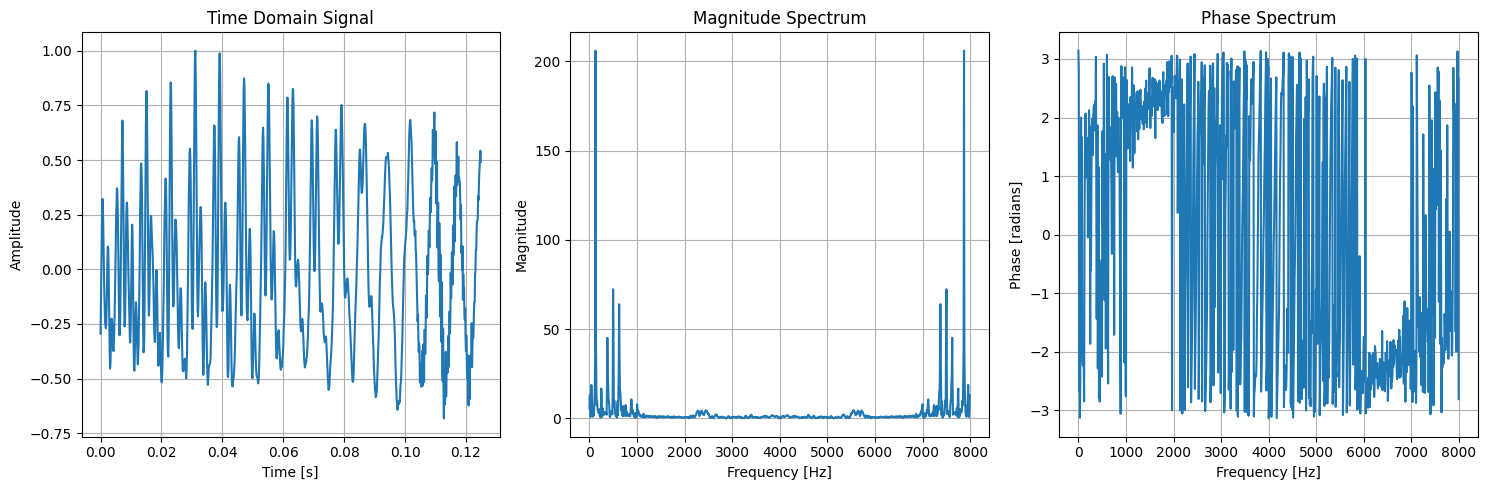

In [5]:
N = len(x)
# time
t = np.arange(N) / fsx

# requensy
f = np.arange(N) * fsx / N

X = DFT(x)

amp = np.abs(X)
ph = np.angle(X)
ph[amp < 0.01] = 0

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(t, x)
ax[0].set_title('Time Domain Signal')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Amplitude')
ax[0].grid()

ax[1].plot(f, amp)
ax[1].set_title('Magnitude Spectrum')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('Magnitude')
ax[1].grid()

ax[2].plot(f, ph)
ax[2].set_title('Phase Spectrum')
ax[2].set_xlabel('Frequency [Hz]')
ax[2].set_ylabel('Phase [radians]')
ax[2].grid()

plt.tight_layout()
plt.show()

<div class="instruction-cell">

#### c)
**Shift** the zero-frequency component to the center of the spectrum and **plot** the shifted spectrum.

***Note**: You can use any `numpy` functions for this!*

</div>

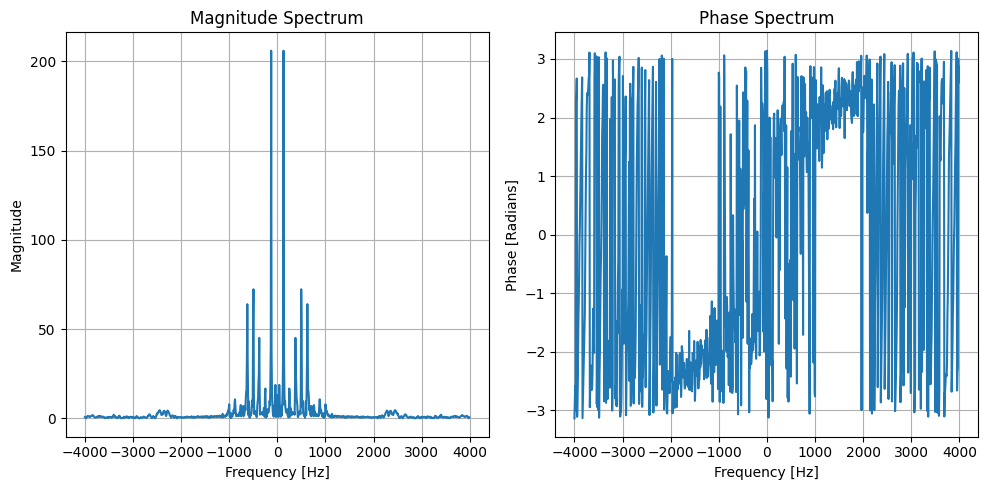

In [6]:
f = np.fft.fftshift(np.fft.fftfreq(N, 1/fsx))

X = np.fft.fftshift(X)

amp = np.abs(X)
ph = np.angle(X)
ph[amp < 0.01] = 0

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(f, amp)
ax[0].grid()
ax[0].set_title('Magnitude Spectrum')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].set_ylabel('Magnitude')

ax[1].plot(f, ph)
ax[1].grid()
ax[1].set_title('Phase Spectrum')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('Phase [Radians]')

plt.tight_layout()
plt.show()

### 2. High-pass filter
<div class="instruction-cell">
Low-frequency noise, such as electrical hum or slow drifts, often contaminates signals received through analog lines like old telephone cables. To clean the signal before modulation and transmission, you want to apply a high-pass filter to eliminate unwanted low-frequency components.
</div>

<div class="instruction-cell">

#### a)

Design, in frequency-domain, an **ideal high-pass filter** that removes all frequency components below **160 Hz**.\
**Plot**, side-by-side, your filter in both time- and frequency domain.

</div>

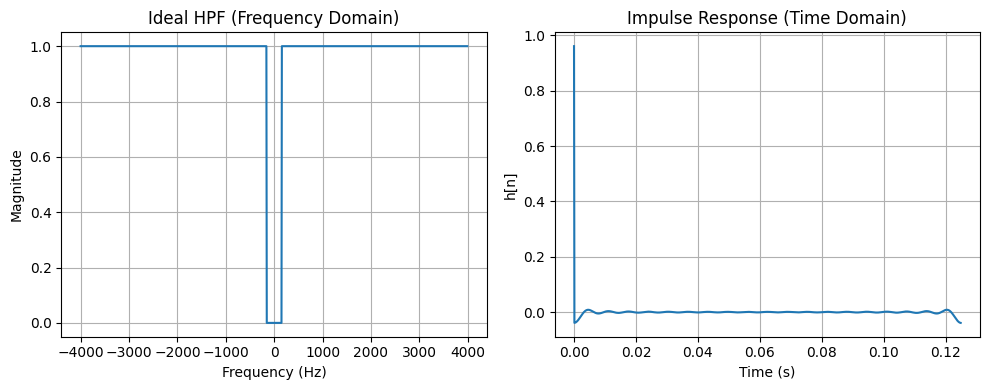

In [7]:
# Redefine frequency axis: unshifted
f = np.fft.fftfreq(N, d=1/fsx)

# Ideal high-pass filter in frequency domain
H = np.zeros(N)
H[np.abs(f) >= 160] = 1  # Mask high frequencies

# Plot frequency response (shifted for visualization)
f_vis = np.fft.fftshift(f)
H_vis = np.fft.fftshift(H)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Frequency domain
ax[0].plot(f_vis, H_vis)
ax[0].set_title("Ideal HPF (Frequency Domain)")
ax[0].set_xlabel("Frequency (Hz)")
ax[0].set_ylabel("Magnitude")
ax[0].grid()

# Time domain: iDFT of unshifted H
h = iDFT(H).real
t_h = np.arange(N) / fsx

# Impulse response
ax[1].plot(t_h, h)
ax[1].set_title("Impulse Response (Time Domain)")
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("h[n]")
ax[1].grid()

plt.tight_layout()
plt.show()

<div class="instruction-cell">

#### b)
Use your DFT and iDFT functions to apply this filter and **reconstruct the filtered signal in the time domain**.

</div>

In [8]:
X = DFT(x)

Y = X * H

y = np.real(iDFT(Y))

<div class="instruction-cell">

#### c)
 Plot, side by side, your reconstructed filtered signal in time- and frequency domain.

</div>

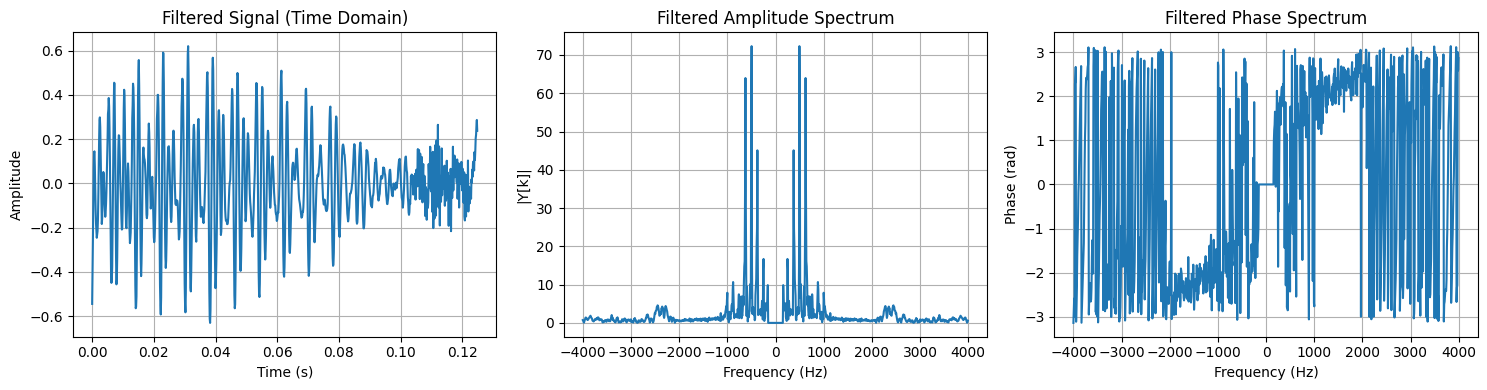

In [9]:
# Time axis
t_y = np.arange(len(y)) / fsx

# Frequency axis for plotting
f_plot = np.fft.fftshift(np.fft.fftfreq(len(y), d=1/fsx))

# Shifted spectrum for visualization
Y_shifted = np.fft.fftshift(Y)
amp = np.abs(Y_shifted)
phase = np.angle(Y_shifted)
phase[amp < 0.01] = 0

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# Time domain plot
ax[0].plot(t_y, y)
ax[0].set_title('Filtered Signal (Time Domain)')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].grid()

# Magnitude spectrum
ax[1].plot(f_plot, amp)
ax[1].set_title('Filtered Amplitude Spectrum')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('|Y[k]|')
ax[1].grid()

# Phase spectrum
ax[2].plot(f_plot, phase)
ax[2].set_title('Filtered Phase Spectrum')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Phase (rad)')
ax[2].grid()

plt.tight_layout()
plt.show()

### 3. Amplitude Modulation (AM)

<div class="instruction-cell">

In radio transmission, amplitude modulation (AM) is used to embed a message signal, like speech, onto a higher-frequency carrier wave for efficient transmission over long distances. This technique ensures compatibility with radio receivers and reduces signal loss during propagation.

</div>

<div class="instruction-cell">
    
#### a)

Generate a **500 Hz carrier signal** (with the same sampling frequency as the speech signal) and apply **amplitude modulation** using the original speech signal as the modulating waveform.

</div>

In [10]:
# Generate 500 Hz carrier
carrier_freq = 500  # Hz
carrier = np.cos(2 * np.pi * carrier_freq * t)

# Apply standard AM: (1 + message) * carrier
x_am = (1 + x) * carrier

<div class="instruction-cell">

#### b)

**Plot**, side by side, the the carrier signal, the original speech signal and the modulated signal in the time domain.

</div>

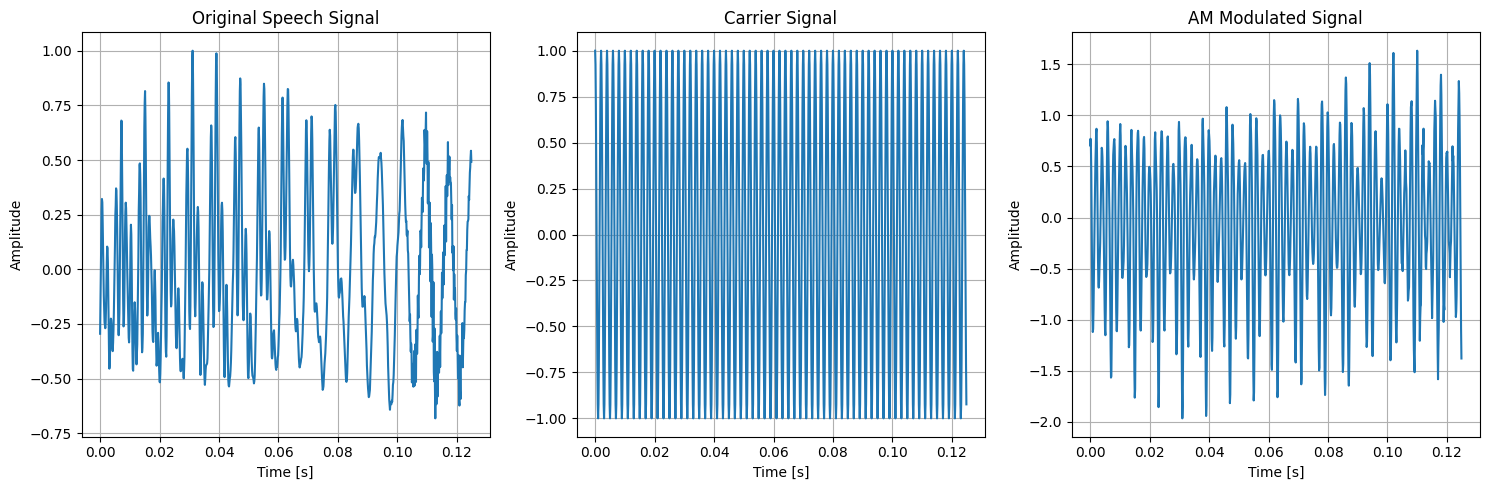

In [11]:
# 1. Original speech signal
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(t, x)
ax[0].set_title('Original Speech Signal')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Amplitude')
ax[0].grid()

# 2. Carrier signal
ax[1].plot(t, carrier)
ax[1].set_title('Carrier Signal')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Amplitude')
ax[1].grid()

# 3. AM modulated signal
ax[2].plot(t, x_am)
ax[2].set_title('AM Modulated Signal')
ax[2].set_xlabel('Time [s]')
ax[2].set_ylabel('Amplitude')
ax[2].grid()

plt.tight_layout()
plt.show()

<div class="instruction-cell">
    
#### c)

Use the Hilbert transform to compute the **envelope** of the amplitude-modulated signal. (You can use `scipy.signal.hilbert`)\
**Plot**, overlapping in a single figure, both the modulated signal and the extracted envelope. Label the signals and also plot the **legend**.

</div>

In [12]:
from scipy.signal import hilbert

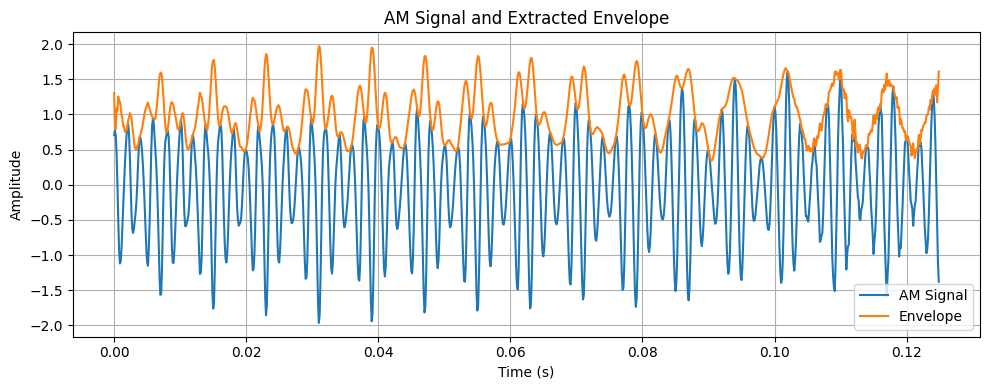

In [13]:
# Compute analytic signal
analytic_signal = hilbert(x_am)

# Extract envelope (magnitude of analytic signal)
envelope = np.abs(analytic_signal)

# Plot modulated signal and envelope
plt.figure(figsize=(10, 4))
plt.plot(t, x_am, label='AM Signal')
plt.plot(t, envelope, label='Envelope')
plt.title("AM Signal and Extracted Envelope")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

<div class="instruction-cell">
    
#### d)

Plot, side by side, both the original signal and the extracted envelope. Label the signals and also plot the **legend**.\
**Comment** on how well the envelope matches the original speech signal.
    
</div>

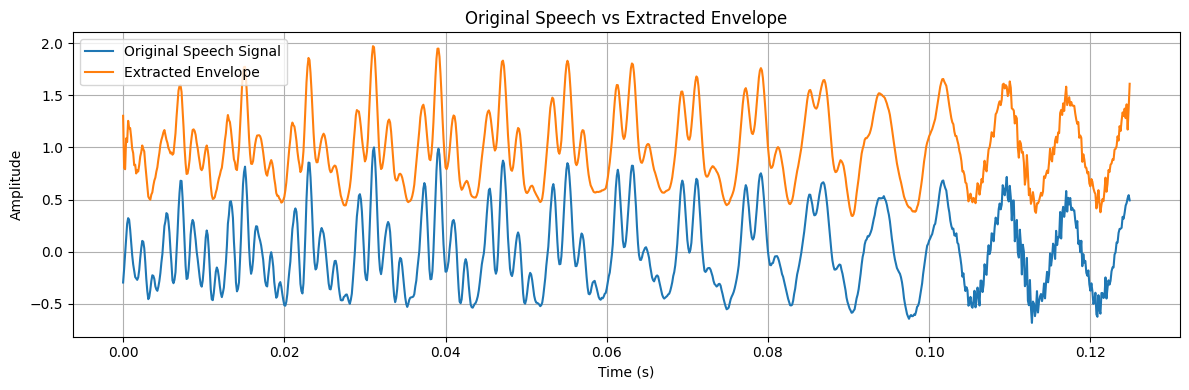

In [14]:
# Plot original speech signal and extracted envelope
plt.figure(figsize=(12, 4))

plt.plot(t, x, label='Original Speech Signal')
plt.plot(t, envelope, label='Extracted Envelope')

plt.title("Original Speech vs Extracted Envelope")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Part II: 2D image analysis

<div class="instruction-cell">
    
You’ve received a **grayscale image** of Christoph Waltz to use in testing a new image analysis pipeline. In this exercise, you'll manipulate and explore this image using core concepts in digital image processing.

</div>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

### Load the image

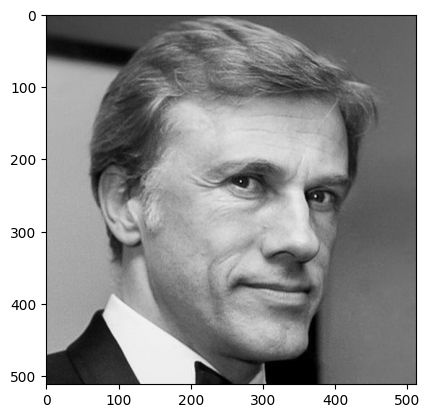

In [16]:
image = plt.imread("./image/christoph512.jpg")
plt.imshow(image, cmap="gray")
plt.show()

### 1. Compute FFT of image

<div class="instruction-cell">
    
In the lecture, we primarily applied the Fast Fourier Transform (FFT) to one-dimensional signals. However, the FFT can be naturally extended to multidimensional signals - most notably to two-dimensional images. This extension is conceptually straightforward: the Discrete Fourier Transform (DFT) is first applied along one dimension (e.g., rows), and then along the other dimension (e.g., columns) of the result. The same approach applies analogously to the inverse DFT. The two-dimensional DFT and its inverse are defined by the following equations:

$$X(u, v) = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f(x, y) \, e^{-j 2\pi \left( \frac{ux}{M} + \frac{vy}{N} \right)}$$

$$ f(x, y) = \frac{1}{MN} \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} X(u, v) \, e^{j 2\pi \left( \frac{ux}{M} + \frac{vy}{N} \right)}$$

</div>

<div class="instruction-cell">
    
#### a)

**Compute** and **visualize** the amplitude and phase spectra of the image using the `np.fft.fft2` function. Make sure to also appropriately use `np.fft.fftshift`. 

**Display** the results in a single figure (size 7×15) with two subplots arranged in one row: show the amplitude spectrum on the left and the phase spectrum on the right. Set the `vmin` and `vmax` arguments of `imshow` to ensure the plots are visually interpretable.

</div>

In [17]:
# Compute 2D FFT
F = np.fft.fft2(image)
F = np.fft.fftshift(F)

# Amplitude and phase
amplitude = np.abs(F)
phase = np.angle(F)

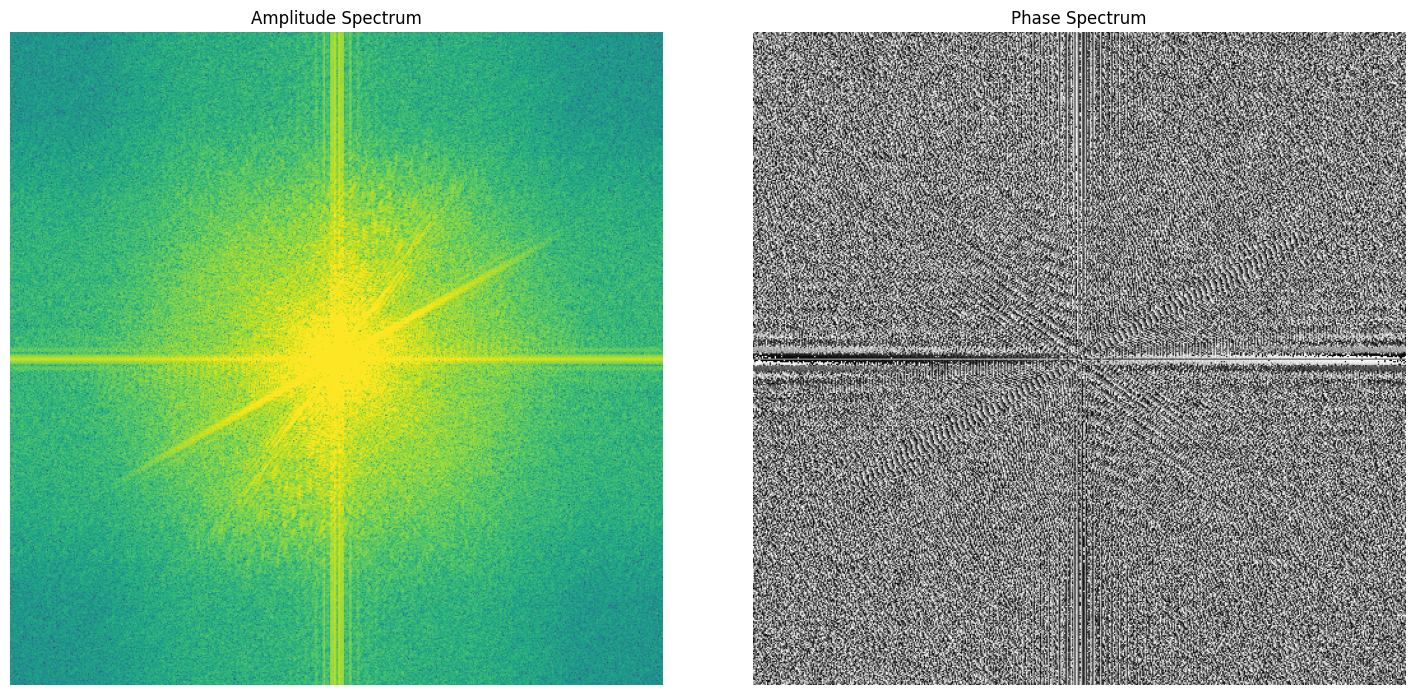

In [18]:
# Visualization
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].imshow(np.log1p(amplitude), vmin=0, vmax=10)
ax[0].set_title('Amplitude Spectrum')
ax[0].axis('off')

ax[1].imshow(phase, cmap='gray', vmin=-np.pi, vmax=np.pi)
ax[1].set_title('Phase Spectrum')
ax[1].axis('off')

plt.tight_layout()
plt.show()

### 2. Compute DCT of image

<div class="instruction-cell">

The Fourier Transform is not the only method available for analyzing the spectral components of images. In this task, you will compute the Discrete Cosine Transform (DCT) of the image.
</div>

<div class="instruction-cell">

#### a)

**Use** the appropriate **DCT** function from the `scipy.fftpack` module to perform this computation. As before, **visualize** the result using `imshow`, and adjust the `vmin` and `vmax` parameters to ensure the visualization is meaningful and easy to interpret.

</div>

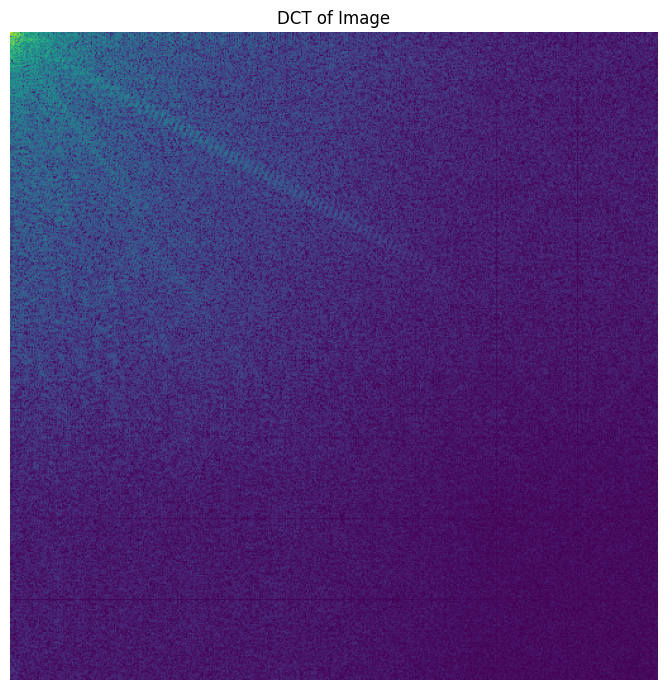

In [19]:
from scipy.fftpack import dct

# Compute 2D DCT using DCT-II with orthonormal normalization
D = dct(dct(image.T, norm='ortho').T, norm='ortho')

# Visualize DCT result
plt.figure(figsize=(15, 7))
plt.imshow(np.log1p(np.abs(D)), vmin=0, vmax=10)
plt.title('DCT of Image')
plt.axis('off')
plt.tight_layout()
plt.show()

### 3. Windowing DCT

<div class="instruction-cell">

In this subtask, we will explore how to compress the image representation using the DCT.

</div>

<div class="instruction-cell">
    
#### a)

**Propose** a windowing scheme that, when applied to the DCT representation of the image, retains most of the important information. **Justify** your choice and **visualize** the window you use.

</div>

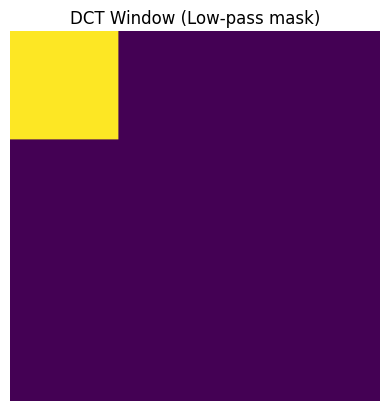

In [20]:
k = 150
window = np.zeros_like(D)
window[:k, :k] = 1

plt.imshow(window)
plt.title('DCT Window (Low-pass mask)')
plt.axis('off')
plt.show()

📊 "The DCT concentrates most of the energy in a few low-frequency coefficients."

🔲 "Important image features are captured in the top-left corner of the DCT matrix."

✂️ "By keeping only this part, we can compress the image while preserving its main structure."

<div class="instruction-cell">
    
#### b)

**Reconstruct** the image from the filtered DCT coefficients. **Compare** it to the original image - what differences do you observe?

</div>

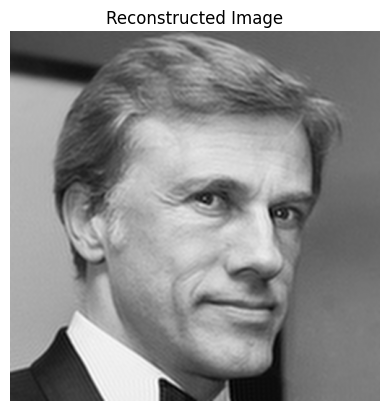

In [21]:
from scipy.fftpack import idct

# Apply window to keep only low-freq DCT coefficients
D = D * window

# Inverse 2D DCT
reconstructed = idct(idct(D.T, norm='ortho').T, norm='ortho')

# Show reconstructed image
plt.imshow(reconstructed, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()

✅ Looks similar overall (same shapes and faces)

❌ Fine details are blurred

✂️ Small textures and edges are missing

🧠 But we saved lots of data by keeping only low frequencies!

<div class="instruction-cell">
    
#### c)

The DCT plays a central role in JPEG image compression. In your own words, **explain** why the DCT is suitable for this purpose and how it is applied within the JPEG compression pipeline.

</div>

📦 DCT is used because:

- It packs most image info into a few numbers (low frequencies).

- It keeps important parts (shapes, smooth areas) and throws away tiny details (noise).

- It works only with real numbers — no complex stuff like DFT.


🔧 JPEG pipeline with DCT:

- Cut image into 8×8 blocks.

- Apply 2D DCT to each block.

- Keep low frequencies, remove high ones.

- Use quantization to reduce precision.

- Store the result efficiently (e.g. Huffman coding).

### 4. DFT windowing

<div class="instruction-cell">
    
Now, let’s investigate how a similar compression approach works with the DFT representation.

</div>

<div class="instruction-cell">

#### a)

**Apply** the same window from the previous exercise to the DFT of the image, then **reconstruct** the image from the filtered DFT coefficients. **Plot** the reconstructed image and **describe** your observations.

</div>

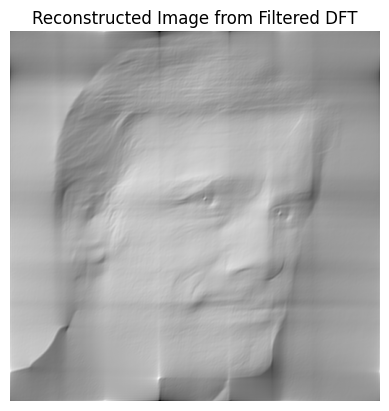

In [22]:
# Compute 2D FFT of image
F = np.fft.fft2(image)

# Apply the same low-pass window
F_filtered = F * window

# Reconstruct the image using inverse FFT
reconstructed_dft = np.fft.ifft2(F_filtered).real

# Plot the reconstructed image
plt.imshow(reconstructed_dft, cmap='gray')
plt.title('Reconstructed Image from Filtered DFT')
plt.axis('off')
plt.show()

The reconstructed image is visible but blurrier than with DCT. High-frequency details are lost, and some ringing artifacts may appear.

<div class="instruction-cell">
    
#### b)

**Design** a new window of the same size that leads to a better-quality reconstructed image. **Visualize** both the new window and the resulting reconstruction.

</div>

In [46]:
# Design new window: circular low-pass filter
rows, cols = image.shape
cx, cy = rows // 2, cols // 2
radius = 80  # keep frequencies within this radius

Y, X = np.ogrid[:rows, :cols]
distance = np.sqrt((X - cy)**2 + (Y - cx)**2)
new_window = np.zeros_like(image)
new_window[distance <= radius] = 1

# Apply new window to DFT
F_new = np.fft.fftshift(np.fft.fft2(image))
F_new_filtered = F_new * new_window
reconstructed_new = np.fft.ifft2(np.fft.ifftshift(F_new_filtered)).real

# # Design new window: rectangular low-pass filter
# rows, cols = image.shape
# cx, cy = rows // 2, cols // 2
# half_height = 80   # height of the rectangle (vertical freq limit)
# half_width = 80    # width of the rectangle (horizontal freq limit)
# 
# # Create rectangular window in frequency domain
# new_window = np.zeros_like(image)
# new_window[cx - half_height:cx + half_height,
#            cy - half_width:cy + half_width] = 1
# 
# # Apply new window to shifted DFT
# F_new = np.fft.fftshift(np.fft.fft2(image))
# F_new_filtered = F_new * new_window
# 
# # Reconstruct the image from the filtered spectrum
# reconstructed_new = np.fft.ifft2(np.fft.ifftshift(F_new_filtered)).real

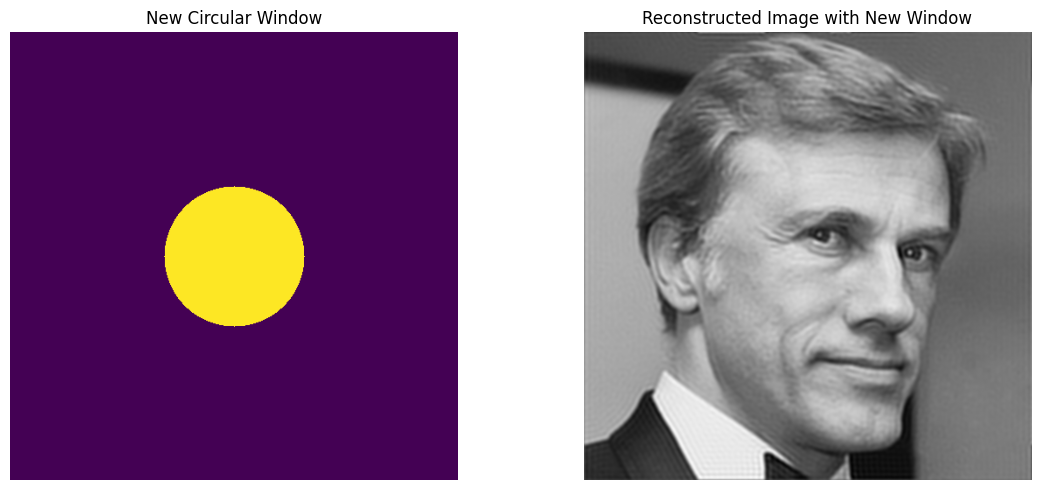

In [47]:
# Visualize new window and reconstruction
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].imshow(new_window)
ax[0].set_title('New Circular Window')
ax[0].axis('off')

ax[1].imshow(reconstructed_new, cmap='gray')
ax[1].set_title('Reconstructed Image with New Window')
ax[1].axis('off')

plt.tight_layout()
plt.show()

<div class="instruction-cell">
    
#### c)

Why is the DCT preferred over the DFT in JPEG compression? **Explain** the reasoning behind this design choice.

</div>

- 📏 DCT uses only real numbers → no complex math like DFT.

- 🚪 No wrap-around artifacts → DCT assumes signal ends at edges (DFT assumes it repeats).

- 📦 Energy is packed in fewer coefficients → better compression.

- 🧼 Cleaner boundaries → fewer visual artifacts in compressed images.Answer goes here

## Part III: Coding

<div class="instruction-cell">

You are working on a brain-computer interface (BCI) system designed to transmit neural activity data from an implanted device to an external decoder in real-time. Due to power and bandwidth constraints, the neural event stream must be compressed on-device before transmission.

The system classifies neural spike patterns into three categories based on their shape and timing:

* P - Phasic spiking
* I  - Irregular spiking
* S - Sustained spiking

</div>

In [25]:
symbols = {
    'P': 0.2,
    'I': 0.3,
    'S': 0.5
}

<div class="instruction-cell">

#### a)

**Create and print** the cumulative probability table.

</div>

In [26]:
# Initialize cumulative table
cumulative = {}

# Sort symbols to ensure consistent order
sorted_items = sorted(symbols.items())

# Build cumulative table
cumul_sum = 0
for symbol, prob in sorted_items:
    cumulative[symbol] = cumul_sum
    cumul_sum += prob

# Print result
print(cumulative)

{'I': 0, 'P': 0.3, 'S': 0.5}


<div class="instruction-cell">

#### b)
**Implement** a function for **arithmetic encoding** function that encodes the entire message into a single fractional value between 0 and 1.

</div>

In [27]:
def arithmetic_encode(message, cumulative):
    low = 0.0
    high = 1.0

    for symbol in message:
        range_ = high - low
        low = low + range_ * cumulative[symbol]
        high = low + range_ * symbols[symbol]

    return (low + high) / 2  # midpoint in final interval

In [28]:
encode = arithmetic_encode("SIP", cumulative)
print(encode)

0.56
